# Single Inverted Pendulum Visualization

This notebook visualizes the performance of evolved agents for the Single Inverted Pendulum task (Pendulum Liter).

In [1]:
%load_ext autoreload
%autoreload 2
import visualization_utils as viz
import numpy as np

/home/lance/anaconda3/envs/shinka/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Agent
Specify the path to the agent file (e.g., `'initial.py'`) or the generation folder name (e.g., `'gen_5'`).

In [2]:
# agent_name = "initial.py"
agent_name = "results_pendulum_liter_2/gen_90" # Change this to visualize evolved agents

try:
    agent = viz.load_agent(agent_name)
    print(f"Successfully loaded agent: {agent_name}")
except Exception as e:
    print(f"Error loading agent: {e}")
    # Fallback to initial if gen_0 doesn't exist yet
    if agent_name == "gen_0":
        print("Falling back to initial.py")
        agent = viz.load_agent("initial.py")

Loading agent from: results_pendulum_liter_2/gen_90/main.py
Successfully loaded agent: results_pendulum_liter_2/gen_90


## Run Simulation
Run the simulation using the loaded agent.

In [3]:
states, forces = viz.run_simulation_with_agent(agent, max_steps=1000)
print(f"Simulation complete. Steps: {len(states)}")

Using agent's internal run_simulation()...
Simulation complete. Steps: 1001


In [4]:
states, forces = viz.run_simulation_with_agent(agent)
viz.print_score(states, forces)

Using agent's internal run_simulation()...

  🏆 PERFORMANCE SCORE (Updated Scoring System)
Final Score:            4871.36 / 10000

📊 Score Breakdown:
  Base Score:            369.02  (stability quality)
  Time Bonus:           2233.79  ⚡ (stabilized at step 192)
  Energy Bonus:         2468.54  💪 (avg energy: 0.0148)
  Success Bonus:         800.00  ✓

⚠️  Penalties:
  Boundary:            -1000.00  (safety violations)

📈 Key Performance Metrics:
  Stabilization Ratio:  19.20%  (lower is better)
  Total Energy:              14.76
  Final Theta Error:        0.0071 rad (0.41°)
  Final X Error:            0.7966 m
  Stable Theta Error:       0.0061 rad (avg after stabilization)
  Stable X Error:           0.5636 m (avg after stabilization)



{'combined_score': 4871.359036569259,
 'public': {'score': 4871.359036569259,
  'base_score': 369.0243690491105,
  'time_bonus': 2233.7913273855515,
  'energy_bonus': 2468.5433401345967,
  'success_bonus': 800.0,
  'stabilization_time': 192,
  'stabilization_ratio': 0.192,
  'avg_energy_per_step': 0.014764227544023506,
  'total_energy': 14.764227544023507,
  'mean_step_reward': 0.36902436904911046,
  'final_theta_error': 0.007084824061303507,
  'final_x_error': 0.7966485745746378,
  'stable_theta_error': 0.006114560853734956,
  'stable_x_error': 0.5635823787380299},
 'private': {'oscillation_penalty': -0.0,
  'angle_oscillation_penalty': -0.0,
  'boundary_penalty': -1000.0,
  'unstable_penalty': 0.0,
  'max_theta': 1.0218879162116492,
  'max_x': 8.850215380215872,
  'max_force': 100.0,
  'force_std': 12.150772663026613}}

## Visualize
Visualize the trajectory and control signals.

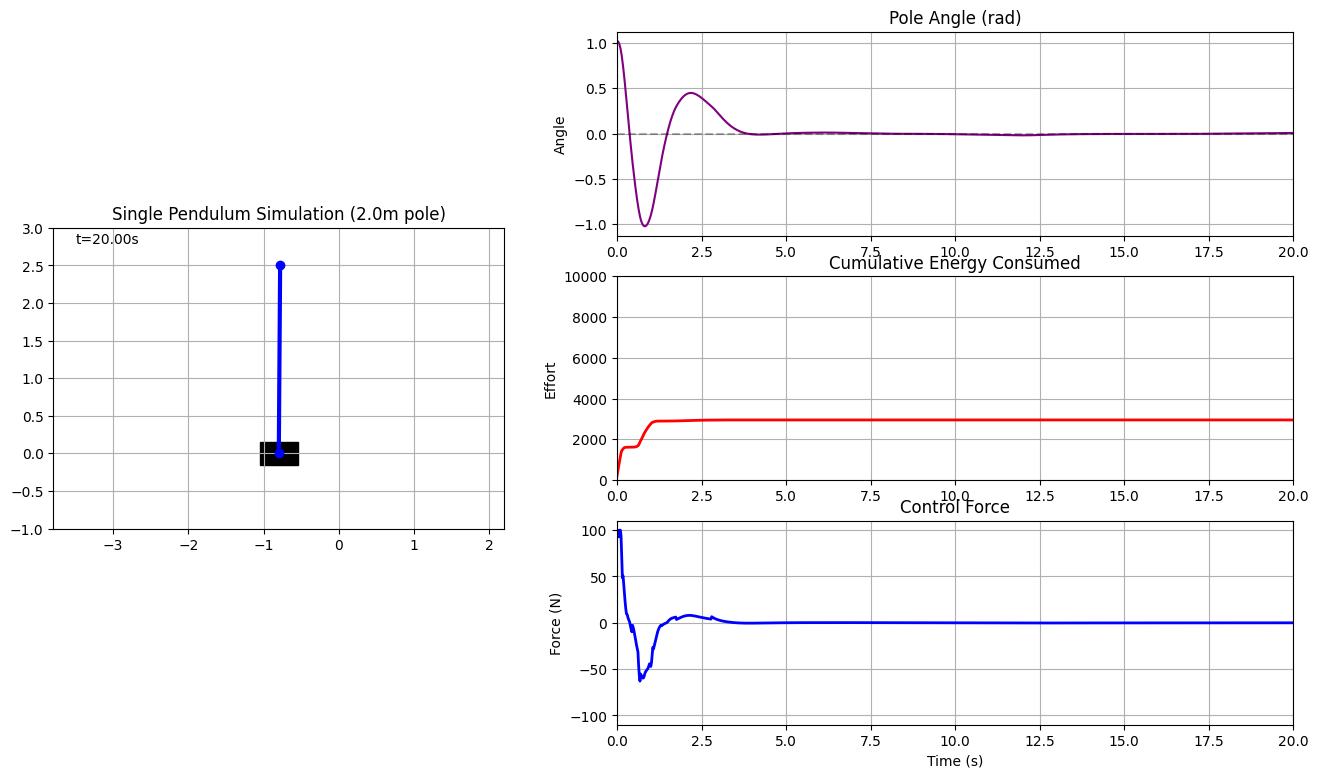

In [5]:
viz.visualize_pendulum_enhanced(states, forces, energy_ylim=10000)